<a href="https://colab.research.google.com/github/viniavena/general-studies/blob/main/Seminario3_SistemasLineares2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introdução

Notebook criado por Vinicius de Oliveira Avena (vini.avena@poli.ufrj.br) para o Seminário 3 da disciplina de Sistemas Lineares II - 2021/1 da Engenharia Eletrônica e de Computação

# Importação das Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")

!pip install control
import control

# Espaço de Estados

### Resposta ao degrau

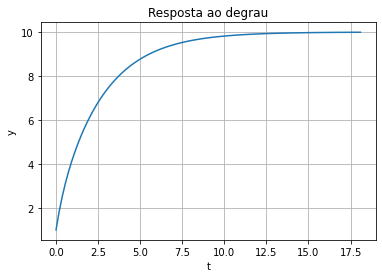

In [ ]:
A = [[0, 1], [-1, -3]]
B = [[1], [0]]
C = [[5, 6]]
D = [[1]]

sys = control.ss(A, B, C, D)

t, y = control.step_response(sys)
plt.plot(t, y)
plt.title("Resposta ao degrau") 
plt.xlabel("t") 
plt.ylabel("y")
plt.grid()
plt.show()

### Função de Transferência

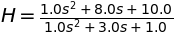

In [ ]:
import scipy.signal as signal
from IPython.display import display
import sympy as sy
import control

sy.init_printing()

num, den = signal.ss2tf(A, B, C, D)


H = signal.lti(num, den)

s = sy.Symbol('s')
H_s = sy.Poly(H.num, s) / sy.Poly(H.den, s)

pH = sy.symbols("H")

display(sy.Eq(pH, H_s))

#### Resposta ao degrau da para a Função de Transferência


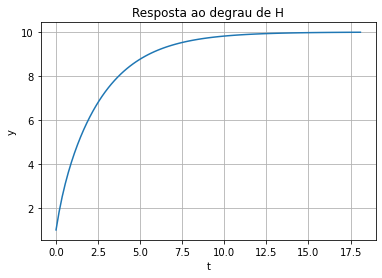

In [ ]:
Hcontrol = control.ss2tf(sys)

t, y = control.step_response(Hcontrol)
plt.plot(t, y)
plt.title("Resposta ao degrau de H")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()


### Exemplo sistema massa-mola


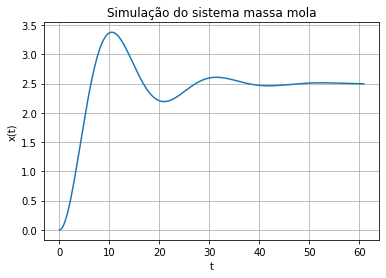

In [ ]:
import control

# parametros do sistema
c = 4
k = 2
m = 20
F = 5
x0 = np.array([[0],[0]])

# def para o tempo de simulação
tstart = 0
tstop = 60
increment = 0.1
t = np.arange(tstart,tstop+1,increment)

A = [[0, 1], [-k/m, -c/m]]
B = [[0], [1/m]]
C = [[1, 0]]
D=0

sys = control.ss(A, B, C, D)

t, x = control.forced_response(sys, t, F)
plt.plot(t, x)
plt.title('Simulação do sistema massa mola') 
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

# Definindo a Matriz de Entrada

In [ ]:
from sympy import Matrix

myMatrix = np.array([[5, 4, 2, 1], [0, 1, -1, -1], [-1, -1, 3, 0], [1, 1, -1, 2]])

myMatrixFormated = Matrix(myMatrix)

print('Matriz de entrada:\n')
myMatrixFormated

Matriz de entrada:



Matrix([
[ 5,  4,  2,  1],
[ 0,  1, -1, -1],
[-1, -1,  3,  0],
[ 1,  1, -1,  2]])

# Teorema de Cayley Hamilton

### Obtendo o Polinômio Característico

In [ ]:
from scipy import array
from scipy.linalg import funm
from sympy import Matrix


print('Pa(λ) = det(λI-A) \n')

print('Pa(λ) =', myMatrixFormated.charpoly().as_expr())



Pa(λ) = det(λI-A) 

Pa(λ) = lambda**4 - 11*lambda**3 + 42*lambda**2 - 64*lambda + 32


### Obtendo os Autovalores


In [ ]:
import scipy.linalg as la

results = la.eig(myMatrix)

print('Autovalores de A: ', results[0])

Autovalores de A:  [4.+0.j 4.+0.j 1.+0.j 2.+0.j]


# Forma Canônica de Jordan

### Matriz P: Transformação Linear com autovetores concatenados

In [ ]:

P, J = myMatrixFormated.jordan_form()

print('Matriz de autovetores:\n\n P = ')
P

Matriz de autovetores:

 P = 


Matrix([
[-1,  1,  1, 1],
[ 1, -1,  0, 0],
[ 0,  0, -1, 0],
[ 0,  1,  1, 0]])

### Forma Canônica de Jordan

In [ ]:

print('Forma canônica de Jordan:\n\n J = ')
J

Forma canônica de Jordan:

 J = 


Matrix([
[1, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 4, 1],
[0, 0, 0, 4]])